In [5]:
import pandas as pd
import seaborn as sns

In [22]:
df = pd.read_csv('2021_tweets_coordenados.csv')
df.head()

,Unnamed: 0,ID,User,Date,Text,Latitude,Longitude,Sentiment,text_clean,num_tokens,X_IVSE,Y_IVSE,label,clase,Estado
0,0,1432855872858902533,dobletocino,2021-09-01T00:00:35.000Z,Menos para la PDH allí las que sean para el enano,15.772467,-90.224221,neutro,menos para la pdh allí las que sean para el enano,11,3.194135,0.539131,0,No Depresión,FDM
1,1,1432855944933822465,albacos88,2021-09-01T00:00:53.000Z,Me encanta mamar verga y culos de los activos....,17.951259,-92.554062,positivo,me encanta mamar verga y culos de los activos,9,3.705558,0.464954,0,No Depresión,Tabasco
2,2,1432856008163053569,Brizz_Briseira,2021-09-01T00:01:08.000Z,@1HelenaConH Jajajaja 🤣 yo llegué al punto en ...,18.021960,-92.916500,positivo,jajajaja yo llegué al punto en que le dije señ...,25,2.208379,2.159584,0,No Depresión,Tabasco
3,3,1432856007860883465,MrMojoRisin259,2021-09-01T00:01:08.000Z,"Hoy no me fue bien en el trabajo; me putearon,...",17.326071,-92.618475,negativo,hoy no me fue bien en el trabajo me putearon m...,37,1.296387,-1.009288,1,Depresión,Chiapas
4,4,1432856047035863045,MarilupeMtz,2021-09-01T00:01:17.000Z,👉Sehunda edición de nuestras actividades en #L...,18.135455,-94.432482,positivo,sehunda edición de nuestras actividades en com...,34,0.034186,1.629649,0,No Depresión,Veracruz


In [23]:
len(df)

12106644

In [24]:
df = df[df['Estado'] != 'FDM']
len(df)

10947488

In [25]:
df = df.sample(1000000)
len(df)

1000000

In [27]:
df['Latitude'].dtype

dtype('float64')

In [28]:
df['Longitude'].dtype

dtype('float64')

In [29]:
df['Text'].dtype

dtype('O')

In [30]:
df = df.drop(['ID', 'User', 'text_clean', 'num_tokens', 'X_IVSE','Y_IVSE','label','clase'], axis=1)

In [31]:
df.head()

,Unnamed: 0,Date,Text,Latitude,Longitude,Sentiment,Estado
8529968,8529968,2021-10-29T01:29:07.000Z,Ya salieron a la cancha Ochoa y Jiménez el abu...,25.676603,-100.196134,positivo,Nuevo León
4804639,4804639,2021-07-27T21:33:32.000Z,@Leonardo_Lo777 ahí vamos andar entonces,32.332876,-116.929102,positivo,Baja California Norte
5326386,5326386,2021-08-30T12:42:37.000Z,"Que tengan una excelente semana, con excelenci...",19.380613,-99.161480,positivo,Ciudad de México
4832019,4832019,2021-08-01T00:23:20.000Z,Ahora suena #Scratch en #MexiquenseRadio @solo...,19.251531,-99.579915,positivo,Estado de México
6638465,6638465,2021-03-28T17:25:45.000Z,"Mucho éxito, mi estimado @victorlozanop con tu...",20.941035,-89.623611,positivo,Yucatán


In [32]:
df.to_csv('muestra_tweets_2021.csv')

In [97]:
df = pd.read_csv('muestra_tweets_2021.csv')

In [98]:
len(df)

1000000

In [99]:
df = df[(df['Sentiment'] == 'positivo') | (df['Sentiment'] == 'negativo')]
df.head()

,Unnamed: 0.1,Unnamed: 0,Date,Text,Latitude,Longitude,Sentiment,Estado
0,8529968,8529968,2021-10-29T01:29:07.000Z,Ya salieron a la cancha Ochoa y Jiménez el abu...,25.676603,-100.196134,positivo,Nuevo León
1,4804639,4804639,2021-07-27T21:33:32.000Z,@Leonardo_Lo777 ahí vamos andar entonces,32.332876,-116.929102,positivo,Baja California Norte
2,5326386,5326386,2021-08-30T12:42:37.000Z,"Que tengan una excelente semana, con excelenci...",19.380613,-99.161480,positivo,Ciudad de México
3,4832019,4832019,2021-08-01T00:23:20.000Z,Ahora suena #Scratch en #MexiquenseRadio @solo...,19.251531,-99.579915,positivo,Estado de México
4,6638465,6638465,2021-03-28T17:25:45.000Z,"Mucho éxito, mi estimado @victorlozanop con tu...",20.941035,-89.623611,positivo,Yucatán


In [100]:
len(df)

695479

Sentiment
positivo    384723
negativo    310756
Name: count, dtype: int64


<Axes: xlabel='Sentiment'>

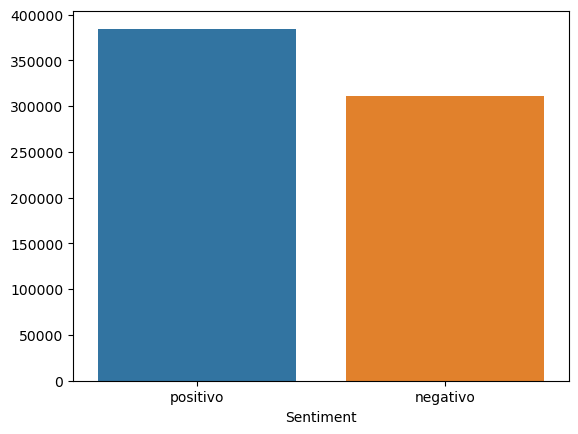

In [101]:
vc=df['Sentiment'].value_counts()
print(vc)
sns.barplot(x=vc.index, y=vc.values)

In [102]:
df = df[df['Sentiment'] == 'positivo']

In [103]:
len(df)

384723

In [104]:
df_positivos = df.groupby(['Estado'])['Sentiment'].count().reset_index()

In [105]:
df_positivos.head()

,Estado,Sentiment
0,Aguascalientes,3343
1,Baja California Norte,4916
2,Baja California Sur,1487
3,Campeche,2885
4,Chiapas,4903


In [106]:
def dime_cve_estado(estado):
    if estado == 'Zacatecas':
        return 'ZAC'
    elif estado == 'Yucatán':
        return 'YUC'
    elif estado == 'Veracruz':
        return 'VER'
    elif estado == 'Tlaxcala':
        return 'TLA'
    elif estado == 'Tamaulipas':
        return 'TAM'
    elif estado == 'Tabasco':
        return 'TAB'
    elif estado == 'Sonora':
        return 'SON'
    elif estado == 'Sinaloa':
        return 'SIN'
    elif estado == 'San Luis Potosí':
        return 'SLP'
    elif estado == 'Quintana Roo':
        return 'ROO'
    elif estado == 'Queretaro':
        return 'QUE'
    elif estado == 'Puebla':
        return 'PUE'
    elif estado == 'Oaxaca':
        return 'OAX'
    elif estado == 'Nuevo León':
        return 'NLE'
    elif estado == 'Nayarit':
        return 'NAY'
    elif estado == 'Morelos':
        return 'MOR'
    elif estado == 'Michoacán':
        return 'MIC'
    elif estado == 'Estado de México':
        return 'MEX'
    elif estado == 'Jalisco':
        return 'JAL'
    elif estado == 'Hidalgo':
        return 'HID'
    elif estado == 'Guerrero':
        return 'GRO'
    elif estado == 'Guanajuato':
        return 'GUA'
    elif estado == 'Durango':
        return 'DUR'
    elif estado == 'Ciudad de México':
        return 'CMX'
    elif estado == 'Colima':
        return 'COL'
    elif estado == 'Coahuila':
        return 'COA'
    elif estado == 'Chihuahua':
        return 'CHH'
    elif estado == 'Chiapas':
        return 'CHP'
    elif estado == 'Campeche':
        return 'CAM'
    elif estado == 'Baja California Sur':
        return 'BCS'
    elif estado == 'Baja California Norte':
        return 'BCN'
    elif estado == 'Aguascalientes':
        return 'AGU'

In [107]:
df_positivos['cve_edo'] = df_positivos.apply(lambda x: dime_cve_estado(x['Estado']), axis=1)

In [108]:
df_positivos

,Estado,Sentiment,cve_edo
0,Aguascalientes,3343,AGU
1,Baja California Norte,4916,BCN
2,Baja California Sur,1487,BCS
3,Campeche,2885,CAM
4,Chiapas,4903,CHP
5,Chihuahua,6219,CHH
6,Ciudad de México,60776,CMX
7,Coahuila,12145,COA
8,Colima,1586,COL
9,Durango,3495,DUR


In [109]:
size = len(df_positivos)
i = 1
data = ""
for index, row in df_positivos.iterrows():
    cve_edo = row['cve_edo']
    valor = row['Sentiment']
    if i < size:
        data = data+"{ id: 'MX-"+cve_edo+"', "+"value:"+str(valor)+" },"
        i+=1
    else:
        data = data+"{ id: 'MX-"+cve_edo+"', "+"value:"+str(valor)+" }"

In [110]:
data

"{ id: 'MX-AGU', value:3343 },{ id: 'MX-BCN', value:4916 },{ id: 'MX-BCS', value:1487 },{ id: 'MX-CAM', value:2885 },{ id: 'MX-CHP', value:4903 },{ id: 'MX-CHH', value:6219 },{ id: 'MX-CMX', value:60776 },{ id: 'MX-COA', value:12145 },{ id: 'MX-COL', value:1586 },{ id: 'MX-DUR', value:3495 },{ id: 'MX-MEX', value:56430 },{ id: 'MX-GUA', value:13329 },{ id: 'MX-GRO', value:5283 },{ id: 'MX-HID', value:5284 },{ id: 'MX-JAL', value:30804 },{ id: 'MX-MIC', value:4893 },{ id: 'MX-MOR', value:6411 },{ id: 'MX-NAY', value:1945 },{ id: 'MX-NLE', value:38545 },{ id: 'MX-OAX', value:5020 },{ id: 'MX-PUE', value:17763 },{ id: 'MX-QUE', value:10836 },{ id: 'MX-ROO', value:12306 },{ id: 'MX-SLP', value:6247 },{ id: 'MX-SIN', value:8653 },{ id: 'MX-SON', value:10982 },{ id: 'MX-TAB', value:7741 },{ id: 'MX-TAM', value:10256 },{ id: 'MX-TLA', value:1767 },{ id: 'MX-VER', value:14140 },{ id: 'MX-YUC', value:11097 },{ id: 'MX-ZAC', value:3236 }"